In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys

In [3]:
import STAGATE
import scanpy as sc

In [15]:
section_id = 'GSM5764423'

In [88]:
file = ''
temp = sc.read_visium(file, count_file=r'filtered_feature_bc_matrix.h5',load_images=True)

In [89]:
adata = sc.read_csv('spatial\counts_ADT_t.csv')

#ADT FILE BARCODES DO NOT END WITH '-1' SO I MANUALLY ADDED THAT
adata.obs_names = [id + "-1" for id in adata.obs_names]  # Add "-1" to all identifiers in adata.obs

adata.var_names_make_unique()

In [90]:
adata

AnnData object with n_obs × n_vars = 1698 × 93

In [91]:
temp

AnnData object with n_obs × n_vars = 1708 × 31053
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [92]:
adata.obs

""
AGCGACCAACGATATT-1
AAACTCGGTTCGCAAT-1
CTATCGACGAAATACA-1
TACCAAATAGCCCAGA-1
ATACCTAACCAAGAAA-1
...
AGGGCAGCGGCGTGGT-1
GTGTCGTATAGCGTTC-1
CCGCGTAGGTAAGGGC-1
CGTGCAGACTGGGACA-1


In [93]:
temp.obs

,in_tissue,array_row,array_col
AAACATTTCCCGGATT-1,1,61,97
AAACCGGGTAGGTACC-1,1,42,28
AAACCGTTCGTCCAGG-1,1,52,42
AAACCTAAGCAGCCGG-1,1,65,83
AAACCTCATGAAGTTG-1,1,37,19
...,...,...,...
TTGTGTATGCCACCAA-1,1,56,60
TTGTGTTTCCCGAAAG-1,1,51,59
TTGTTAGCAAATTCGA-1,1,22,42
TTGTTCAGTGTGCTAC-1,1,24,64


Custom Function to filter out the Uncommon barcodes to avoid error 

In [94]:

def compare_obs_unique_ids(adata1, adata2):
    """
    Compare unique row identifier values between two AnnData objects' .obs attribute.

    Args:
        adata1 (anndata.AnnData): First AnnData object.
        adata2 (anndata.AnnData): Second AnnData object.

    Returns:
        set: Set of unique row identifier values present in both adata1.obs and adata2.obs.
    """
    obs_ids1 = set(adata1.obs.index.tolist())
    obs_ids2 = set(adata2.obs.index.tolist())
    common_ids = obs_ids1.intersection(obs_ids2)
    return common_ids

# Example usage:
# Assuming you have two AnnData objects, adata and temp, with .obs attribute containing row identifiers.


def filter_common_rows(adata1, adata2):
    """
    Filter two AnnData objects and keep only the rows with common unique identifiers.

    Args:
        adata1 (anndata.AnnData): First AnnData object.
        adata2 (anndata.AnnData): Second AnnData object.

    Returns:
        tuple: Tuple of filtered AnnData objects, (filtered_adata1, filtered_adata2).
    """
    common_ids = compare_obs_unique_ids(adata1, adata2)  # Assuming you have the compare_obs_unique_ids function from the previous code

    # Convert common_ids set to list
    common_ids = list(common_ids)

    filtered_adata1 = adata1[common_ids]
    filtered_adata2 = adata2[common_ids]

    return filtered_adata1, filtered_adata2

# Example usage:
# Assuming you have two AnnData objects, adata and temp, with .obs attribute containing row identifiers.



Call custom function

In [95]:
adata, temp = filter_common_rows(adata, temp)


In [96]:
adata

View of AnnData object with n_obs × n_vars = 1698 × 93

In [97]:
temp

View of AnnData object with n_obs × n_vars = 1698 × 31053
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [98]:
adata.obsm=temp.obsm

In [99]:
adata.uns = temp.uns


In [100]:
adata

AnnData object with n_obs × n_vars = 1698 × 93
    uns: 'spatial'
    obsm: 'spatial'

In [101]:
#Normalization
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)



------Calculating spatial graph...
The graph contains 0 edges, 1698 cells.
0.0000 neighbors per cell on average.


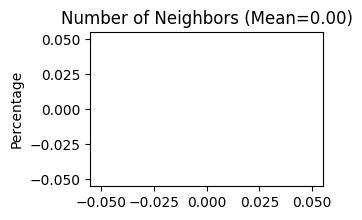

In [102]:
STAGATE.Cal_Spatial_Net(adata, rad_cutoff=150)
STAGATE.Stats_Spatial_Net(adata)

In [103]:
adata = STAGATE.train_STAGATE(adata, alpha=0)

Size of Input:  (1698, 93)


100%|██████████| 500/500 [00:17<00:00, 28.22it/s]


In [104]:
r"C:\Users\KARAN\AppData\Local\R\win-library\4.3\spatialLIBD\data"

'C:\\Users\\KARAN\\AppData\\Local\\R\\win-library\\4.3\\spatialLIBD\\data'

In [105]:
os.environ['R_HOME'] = r"C:\Program Files\R\R-4.3.0"
os.environ['R_USER'] = r"C:\Users\KARAN\anaconda3\envs\STAGATE_PT\Lib\site-packages\rpy2"


In [106]:
sc.pp.neighbors(adata, use_rep='STAGATE')
sc.tl.umap(adata)
adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=7)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


In [107]:
adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=7)
obs_df = adata.obs.dropna()


fitting ...
  |======================================================================| 100%


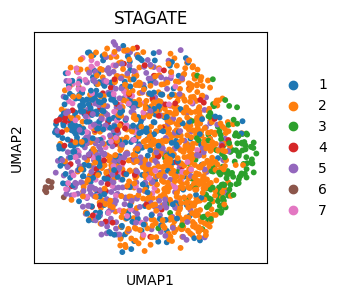

In [112]:
plt.rcParams["figure.figsize"] = (3, 3)
sc.pl.umap(adata, color=["mclust"], title=['STAGATE'])

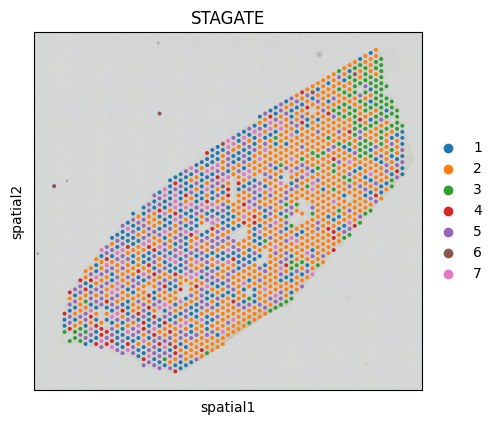

In [113]:
plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.spatial(adata, color=["mclust"], title=['STAGATE'])